# Jogador de Forca

In [89]:
import random
import requests
class JogoDeForca:  
    def __init__(self):
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n') # lista de 245367 palavras
        else:
            print("Erro: ", r.status_code)
    
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content) # Escolhe uma palavra aleatória
        self.palavra = self.palavra.lower().strip() # Converte a palavra para minúsculas e remove espaços em branco
        return len(self.palavra) # Retorna o tamanho da palavra

    def tentar_letra(self, letra):
        if self.vidas > 0: # Se ainda tem vidas
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra] # Retorna a lista de índices onde a letra aparece
            else:
                self.vidas -= 1 # Perde uma vida se a letra não estiver na palavra
                if self.vidas == 0: # Se acabaram as vidas, o jogo acaba
                    print("Fim de jogo!")
                    return False
                else:
                    return [] # Se a letra não estiver na palavra, retorna uma lista vazia
        
    def tentar_palavra(self, palavra):
        if self.vidas > 0: # Se ainda tem vidas
            if self.palavra == palavra: # Ganha o jogo se a palavra está correta
                print ("Ganhou!")
                return True
            else: # Perde o jogo se a palavra está errada
                self.vidas = 0
                print("Fim de jogo!")
                return False

In [90]:
jogo = JogoDeForca()

In [91]:
jogo.novo_jogo() # Inicia um novo jogo
descoberta = ['_']*len(jogo.palavra) # Inicia a palavra descoberta com '_'
print(jogo.vidas) # Mostra o número de vidas
print("".join(descoberta)) # Mostra a palavra que o jogador descobriu até agora
palavras_com_mesmo_tamanho = [palavra.lower() for palavra in jogo.content if len(palavra)==len(jogo.palavra)] # Lista de palavras com o mesmo tamanho
letras_passadas = [] # Inicia a lista de letras que já foram escolhidas
while jogo.vidas > 0:
    # Verifica a frequência de cada letra nas palavras com o mesmo tamanho
    frequencia_letras = {}
    for palavra in palavras_com_mesmo_tamanho: # Percorre todas as palavras com o mesmo tamanho
        for letra in palavra: # Percorre todas as letras da palavra
            if letra in frequencia_letras:
                frequencia_letras[letra] += 1 # Incrementa a frequência da letra se ela já foi encontrada
            else:
                frequencia_letras[letra] = 1 # Inicia a frequência da letra se ela ainda não foi encontrada

    # Escolhe a letra mais frequente que ainda não foi escolhida
    while True:
        letra = max(frequencia_letras, key=frequencia_letras.get)
        if letra in letras_passadas:
            del frequencia_letras[letra]
        else:
            break

    letras_passadas.append(letra) # Adiciona a letra escolhida à lista de letras passadas
    indices_letra = jogo.tentar_letra(letra) 
    if indices_letra == False: # Se o jogador perdeu o jogo
        print("Perdeu! A palavra era: ", jogo.palavra)
        break
    elif indices_letra == []:
        # Se a letra não está na palavra, remove todas as palavras que contêm a letra
        palavras_com_mesmo_tamanho = [palavra for palavra in palavras_com_mesmo_tamanho if letra not in palavra]
    else:
        # Se a letra está na palavra, remove todas as palavras que não contêm a letra nas posições corretas
        palavras_com_mesmo_tamanho = [palavra for palavra in palavras_com_mesmo_tamanho if all([palavra[idx]==letra for idx in indices_letra])]

    for idx in indices_letra: # Atualiza a palavra descoberta com a letra descoberta
        descoberta[idx] = letra

    print(jogo.vidas) # Mostra o número de vidas
    print("".join(descoberta)) # Mostra a palavra que o jogador descobriu até agora

    if '_' not in descoberta and jogo.vidas > 0: # Se o jogador descobriu a palavra
        palavra = ''.join(descoberta) # Transforma a lista de letras em uma string
        jogo.tentar_palavra(palavra) # Tenta a palavra
        break

    if jogo.vidas == 0: # Se o jogador perdeu o jogo
        print("Perdeu! A palavra era: ", jogo.palavra)
        break


5
_________
4
_________
4
e_____e__
4
e_____e_i
3
e_____e_i
3
e_____eci
2
e_____eci
2
em____eci
2
emp___eci
2
empo__eci
2
empob_eci
2
empobreci
Ganhou!


In [92]:
# Vitórias:  9446
# Derrotas:  554
# Porcentagem de vitórias:  94.46 %
# Tempo de execução:  6m 43.0s

In [93]:
# Vitórias:  9434 94,34%
# Derrotas:  566 5,66%
# Tempo de execução:  6m 46.1s

In [94]:
# Função do jogador de forca
def jogador_forca():
    jogo.novo_jogo() # Inicia um novo jogo
    descoberta = ['_']*len(jogo.palavra) # Inicia a palavra descoberta com '_'
    palavras_com_mesmo_tamanho = [palavra.lower() for palavra in jogo.content if len(palavra)==len(jogo.palavra)] # Lista de palavras com o mesmo tamanho
    letras_passadas = [] # Inicia a lista de letras que já foram escolhidas
    while jogo.vidas > 0:
        # Verifica a frequência de cada letra nas palavras com o mesmo tamanho
        frequencia_letras = {}
        for palavra in palavras_com_mesmo_tamanho: # Percorre todas as palavras com o mesmo tamanho
            for letra in palavra: # Percorre todas as letras da palavra
                if letra in frequencia_letras:
                    frequencia_letras[letra] += 1 # Incrementa a frequência da letra se ela já foi encontrada
                else:
                    frequencia_letras[letra] = 1 # Inicia a frequência da letra se ela ainda não foi encontrada
        
        if '_' not in descoberta: # Se o jogador descobriu a palavra
            palavra = ''.join(descoberta) # Transforma a lista de letras em uma string
            jogo.tentar_palavra(palavra) # Tenta a palavra
            break

        # Escolhe a letra mais frequente que ainda não foi escolhida
        while True:
            letra = max(frequencia_letras, key=frequencia_letras.get) # Escolhe a letra mais frequente. Argumentos: dicionário, função
            if letra in letras_passadas:
                del frequencia_letras[letra]
            else:
                break
        

        letras_passadas.append(letra) # Adiciona a letra escolhida à lista de letras passadas
        indices_letra = jogo.tentar_letra(letra)
        if indices_letra == False: # Se o jogador perdeu o jogo
            print("Perdeu! A palavra era: ", jogo.palavra)
            break
        elif indices_letra == []:
            # Se a letra não está na palavra, remove todas as palavras que contêm a letra nas posições erradas
            palavras_com_mesmo_tamanho = [palavra for palavra in palavras_com_mesmo_tamanho if all([palavra[idx]!=letra for idx in range(len(palavra))])]
        else:
            # Se a letra está na palavra, remove todas as palavras que não contêm a letra nas posições corretas
            palavras_com_mesmo_tamanho = [palavra for palavra in palavras_com_mesmo_tamanho if all([palavra[idx]==letra for idx in indices_letra])]

        for idx in indices_letra: # Atualiza a palavra descoberta com a letra descoberta
            descoberta[idx] = letra

        # print(jogo.vidas) # Mostra o número de vidas
        # print("".join(descoberta)) # Mostra a palavra que o jogador descobriu até agora

        if '_' not in descoberta and jogo.vidas > 0: # Se o jogador descobriu a palavra
            palavra = ''.join(descoberta) # Transforma a lista de letras em uma string
            jogo.tentar_palavra(palavra) # Tenta a palavra
            break

        if jogo.vidas == 0: # Se o jogador perdeu o jogo
            print("Perdeu! A palavra era: ", jogo.palavra)
            break

    if jogo.vidas > 0:
        return True
    else:
        return [jogo.palavra, descoberta, letras_passadas]

In [95]:
vitorias = 0
casos_de_erro = []
for i in range(10000):
    resultado = jogador_forca()
    if resultado == True:
        vitorias += 1
    else:
        casos_de_erro.append(resultado)

Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Perdeu! A palavra era:  manobra
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Perdeu! A palavra era:  zurrarei
Ganhou!
Ganhou!
Fim de jogo!
Perdeu! A palavra era:  lavei
Ganhou!
Ganhou!
Fim de jogo!
Perdeu! A palavra era:  uivem
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Perdeu! A palavra era:  azules
Fim de jogo!
Perdeu! A palavra era:  insularam
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Perdeu! A palavra era:  afixe
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
G

In [97]:
# Funções de suporte para a base dados

# Função recebe uma coluna do dataframe e retorna um dicionário com a frequência de cada letra
def frequencia_letras_restantes(coluna_letras):
    frequencia_letras = {}
    for letras in coluna_letras: # Percorre todas as listas de letras
        for letra in letras: # Percorre todas as letras da lista
            if letra in frequencia_letras:
                frequencia_letras[letra] += 1 # Incrementa a frequência da letra se ela já foi encontrada
            else:
                frequencia_letras[letra] = 1 # Inicia a frequência da letra se ela ainda não foi encontrada
    return frequencia_letras

def descobre_letras_restantes(palavra, descoberta): # Função que descobre as letras que faltam descobrir nas palavras
    # Cria uma lista de letras que faltam descobrir
    letras_restantes = []
    for idx in range(len(palavra)): # Percorre todas as letras da palavra
        if palavra[idx] != descoberta[idx]: # Se a letra não foi descoberta
            letras_restantes.append(palavra[idx]) # Adiciona a letra à lista de letras que faltam descobrir
    # Remove as letras repetidas da lista
    letras_restantes = list(set(letras_restantes))
    return letras_restantes

def percentual_de_letras_diferentes_descobertas(palavra, descoberta, letras_restantes): # Função que calcula o percentual de letras diferentes descobertas
    return len(letras_restantes)/len(set(palavra)) # Retorna o percentual de letras diferentes descobertas

In [212]:
# Criando um dataframe com os casos de erro

import pandas as pd
# Cria um dataframe com os casos de erro
df = pd.DataFrame(casos_de_erro, columns=['Palavra', 'Descoberta', 'Letras passadas'])
# Adiciona a coluna de tamanho da palavra
df['Tamanho'] = df['Palavra'].apply(len)
# Adiciona a coluna de quantidade de letras diferentes descobertas
df['Letras diferentes'] = df['Descoberta'].apply(lambda x: len(set(x))-1) # Subtrai 1 para desconsiderar o '_'
# Adiciona a coluna de quantidade de letras que faltam descobrir
df['Num de letras faltando'] = df['Descoberta'].apply(lambda x: x.count('_'))
# Lista de quais são as letras que faltam descobrir
lista_letras_faltando = []
# Lista do percentual de letras diferentes descobertas
lista_percentual_letras_diferentes_descobertas = []
for idx in df.index: # Percorre todas as palavras
        palavra = df.loc[idx, 'Palavra']
        descoberta = df.loc[idx, 'Descoberta']
        letras_faltando = descobre_letras_restantes(palavra, descoberta)
        lista_letras_faltando.append(letras_faltando)
        percentual = percentual_de_letras_diferentes_descobertas(palavra, descoberta, letras_faltando)
        lista_percentual_letras_diferentes_descobertas.append(percentual)
# Adiciona a coluna de letras faltando
df['Letras faltando'] = lista_letras_faltando
# Adiciona a coluna de percentual de letras diferentes descobertas
df['Percentual letras diferentes descobertas'] = lista_percentual_letras_diferentes_descobertas
# Salva o dataframe em um arquivo csv
df.to_csv('data/casos_de_erro_v1.csv', index=False)
# Mostra o dataframe 
df.head()

,Palavra,Descoberta,Letras passadas,Tamanho,Letras diferentes,Num de letras faltando,Letras faltando,Percentual letras diferentes descobertas
0,manobra,"[m, a, n, _, _, r, a]","[a, r, c, t, l, n, m, e, d]",7,4,2,"[b, o]",0.333333
1,zurrarei,"[_, _, r, r, a, r, e, i]","[a, r, e, s, i, o, b, c, f]",8,4,2,"[z, u]",0.333333
2,lavei,"[_, a, v, e, i]","[a, s, r, m, i, e, c, v, h]",5,4,1,[l],0.200000
3,uivem,"[_, i, _, e, m]","[a, e, m, o, r, i, t, l]",5,3,2,"[u, v]",0.400000
4,azules,"[a, _, u, l, e, s]","[a, e, i, s, r, u, d, c, l, n]",6,5,1,[z],0.166667


In [213]:
print(f"Vitórias: {vitorias} -> {vitorias/100:.2f}%")
print(f"Derrotas: {len(casos_de_erro)} -> {len(casos_de_erro)/100:.2f}%")

Vitórias: 9442 -> 94.42%
Derrotas: 558 -> 5.58%


In [111]:
print("Vitórias: ", vitorias)
print("Derrotas: ", len(casos_de_erro))


Vitórias:  9442
Derrotas:  558


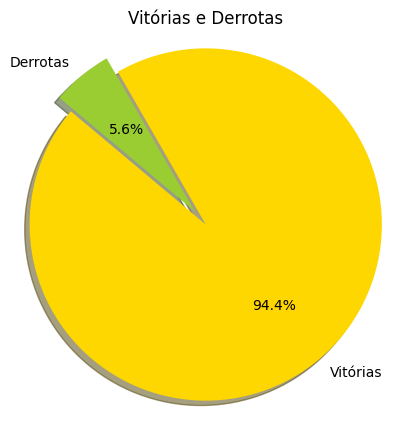

In [214]:
# Gráfico de pizza com quantidade de vitórias e derrotas
import matplotlib.pyplot as plt
labels = 'Vitórias', 'Derrotas'
sizes = [vitorias, len(casos_de_erro)]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
plt.figure(figsize=(5, 5))
plt.title('Vitórias e Derrotas')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

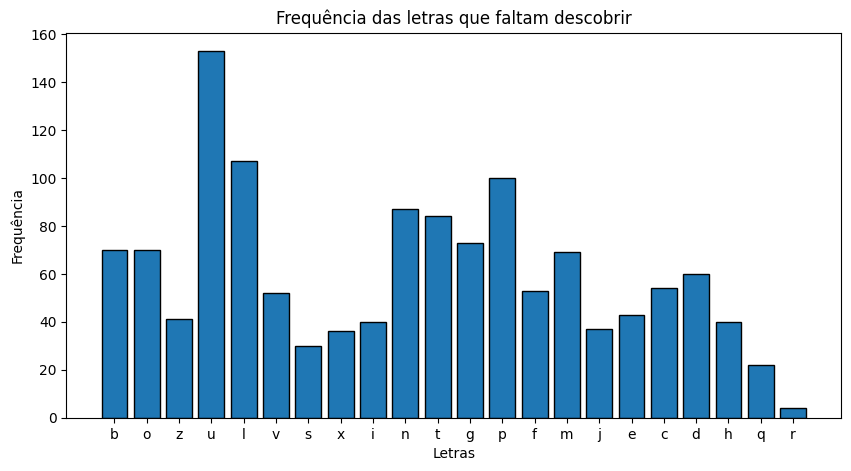

In [208]:
# Gráfico de barras com a frequência das letras que faltam descobrir
import matplotlib.pyplot as plt
frequencia = frequencia_letras_restantes(df['Letras faltando'])
plt.figure(figsize=(10, 5))
plt.bar(frequencia.keys(), frequencia.values(), edgecolor='black')
plt.xlabel('Letras')
plt.ylabel('Frequência')
plt.title('Frequência das letras que faltam descobrir')
plt.show()

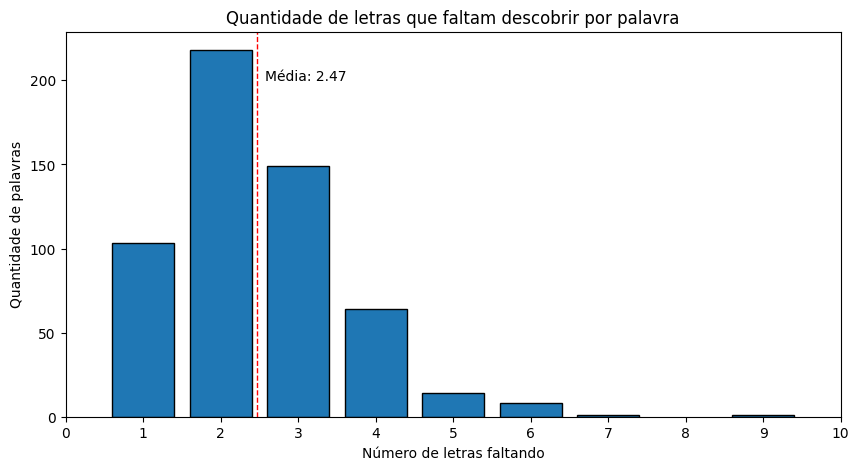

In [209]:
# Gráfico de barras com a quantidade de letras que faltam descobrir por palavra
plt.figure(figsize=(10, 5))
# plt.hist(df['Num de letras faltando'], bins=3*len(set(df['Num de letras faltando'])), edgecolor='black', align='left')
plt.bar(df['Num de letras faltando'].value_counts().index, df['Num de letras faltando'].value_counts().values, edgecolor='black')
plt.xticks(range(max(df['Num de letras faltando'])+2))
plt.xlabel('Número de letras faltando')
plt.ylabel('Quantidade de palavras')
plt.title('Quantidade de letras que faltam descobrir por palavra')
# Linha que mostra a média de letras que faltam descobrir
plt.axvline(df['Num de letras faltando'].mean(), color='r', linestyle='dashed', linewidth=1)
# Legenda da média
plt.text(df['Num de letras faltando'].mean()+0.1, 200, 'Média: {:.2f}'.format(df['Num de letras faltando'].mean()))
plt.show()

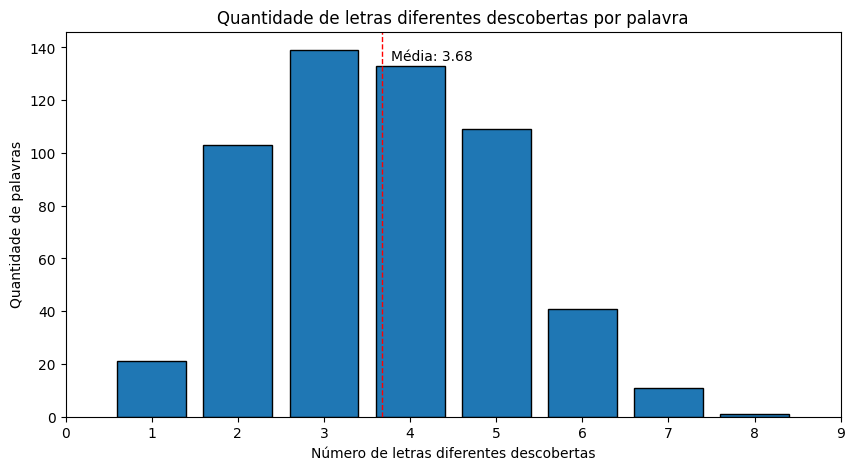

In [210]:
# Gráfico de barras com a quantidade de letras diferentes descobertas por palavra
plt.figure(figsize=(10, 5))
# plt.hist(df['Letras diferentes'], bins=3*(len(set(df['Letras diferentes']))) , edgecolor='black', align='left')
plt.bar(df['Letras diferentes'].value_counts().index, df['Letras diferentes'].value_counts().values, edgecolor='black')
plt.xticks(range(max(df['Letras diferentes'])+2))
plt.xlabel('Número de letras diferentes descobertas')
plt.ylabel('Quantidade de palavras')
plt.title('Quantidade de letras diferentes descobertas por palavra')
# Linha que mostra a média de letras diferentes descobertas
plt.axvline(df['Letras diferentes'].mean(), color='r', linestyle='dashed', linewidth=1)
# Legenda da média
plt.text(df['Letras diferentes'].mean()+0.1, 135, 'Média: {:.2f}'.format(df['Letras diferentes'].mean()))
plt.show()

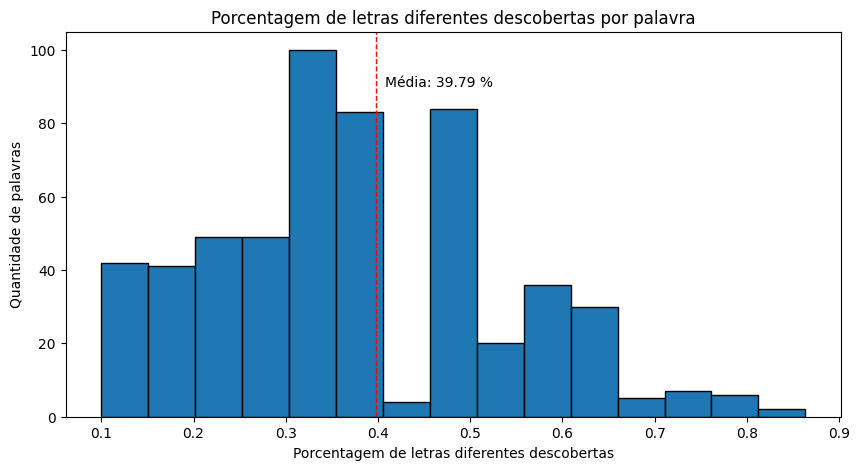

In [211]:
# Gráfico que mostra a porcentagem de letras diferentes descobertas por palavra
plt.figure(figsize=(10, 5))
plt.hist(df['Percentual letras diferentes descobertas'], bins=15, edgecolor='black', align='left')
plt.xlabel('Porcentagem de letras diferentes descobertas')
plt.ylabel('Quantidade de palavras')
plt.title('Porcentagem de letras diferentes descobertas por palavra')
# Linha que mostra a média de porcentagem de letras diferentes descobertas
plt.axvline(df['Percentual letras diferentes descobertas'].mean(), color='r', linestyle='dashed', linewidth=1)
# Legenda da média
media = df['Percentual letras diferentes descobertas'].mean()*100
plt.text(df['Percentual letras diferentes descobertas'].mean()+0.01, 90, f'Média: {media:.2f} %')
plt.show()